# Q4.
##### USE MY BAYESIANNET TOOLBOX - Gibbs Sampling

In [19]:
%matplotlib inline

In [20]:
from bayesianNet import *

In [21]:
myModel = BayesianModel([('firstStep','secondStep'),('secondStep','thirdStep'),\
                             ('firstStep','sensor_s1'),('secondStep','sensor_s2'),('thirdStep','sensor_s3')])

myModel.add_cpd('firstStep',[[0.2],[0.8]])
myModel.add_cpd('secondStep',[[1, 0.2], [0, 0.8]],evidences=['firstStep'])
myModel.add_cpd('thirdStep',[[1, 0.2], [0, 0.8]],evidences=['secondStep'])
myModel.add_cpd('sensor_s1',[[1, 0.5], [0, 0.5]],evidences=['firstStep'])
myModel.add_cpd('sensor_s2',[[1, 0.5], [0, 0.5]],evidences=['secondStep'])
myModel.add_cpd('sensor_s3',[[1, 0.5], [0, 0.5]],evidences=['thirdStep'])

gibbs = GibbsSampler(myModel)

tuner = GridSearchTuner(gibbs,burnInCoefficient=np.arange(0,0.3,0.05),thinningGap=np.arange(1,6,1))

ve = VE(myModel)

##### Query 1

In [22]:
### VE query
exactFactor = ve.query(['thirdStep'])

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.48799999999999993, (False,): 0.512}




            The optimal hyper-parameters are:
            {'burnInCoefficient': 0.0, 'thinningGap': 3}
            The corresponding error is:
            0.05092215568862285
            


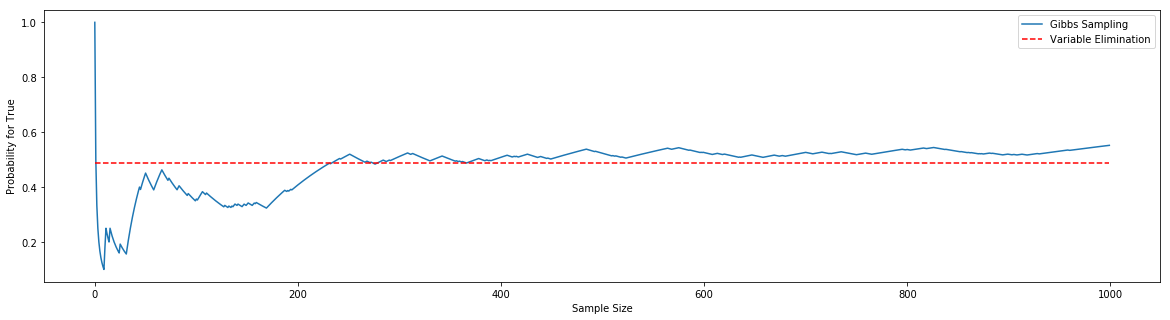

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.5389221556886228, (False,): 0.46107784431137727}



In [23]:
### Gibbs query with hyper-parameters tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,plotTrigger=True)

##### Query 2

In [24]:
### VE query
exactFactor = ve.query(['thirdStep'],evidences={'sensor_s2':True})

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.6235294117647058, (False,): 0.3764705882352941}




            The optimal hyper-parameters are:
            {'burnInCoefficient': 0.20000000000000001, 'thinningGap': 1}
            The corresponding error is:
            0.0002205882352942501
            


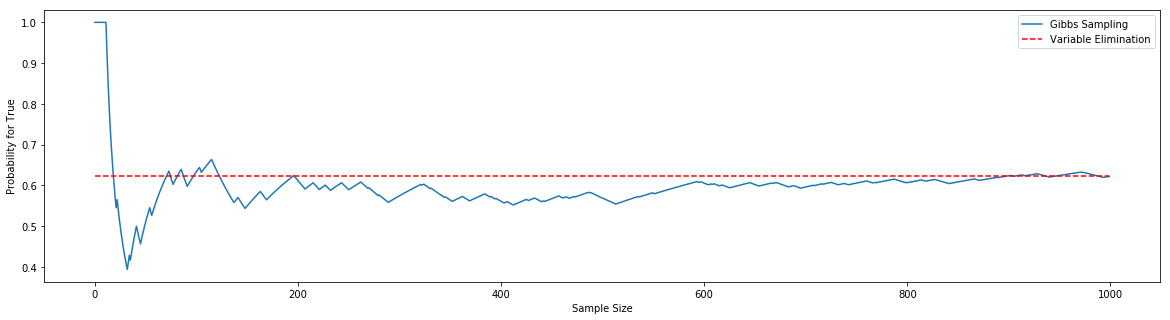

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.62375, (False,): 0.37625}



In [25]:
### Gibbs query with hyper-parameters tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,evidences={'sensor_s2':True},plotTrigger=True)

##### Query 3

In [26]:
### VE query
exactFactor = ve.query(['thirdStep'],evidences={'sensor_s1':True,'sensor_s2': False,'sensor_s3': True})

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.3333333333333333, (False,): 0.6666666666666666}




            The optimal hyper-parameters are:
            {'burnInCoefficient': 0.25, 'thinningGap': 3}
            The corresponding error is:
            0.002666666666666706
            


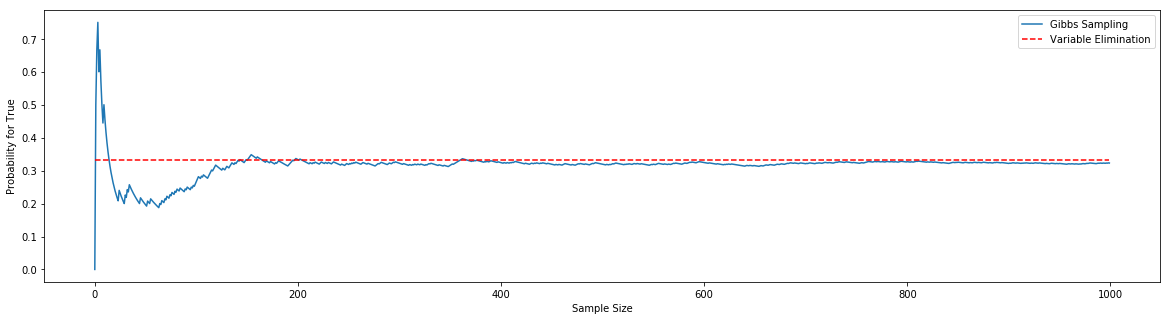

Variables: ('thirdStep',)
 Probability Distribution:
{(True,): 0.336, (False,): 0.664}



In [27]:
### Gibbs query with hyper-parameters tuning
bestModel = tuner.tune(['thirdStep'],exactFactor,{'sensor_s1':True,'sensor_s2': False,'sensor_s3': True},\
                       plotTrigger=True)